In [4]:
%load_ext autoreload
%autoreload 2

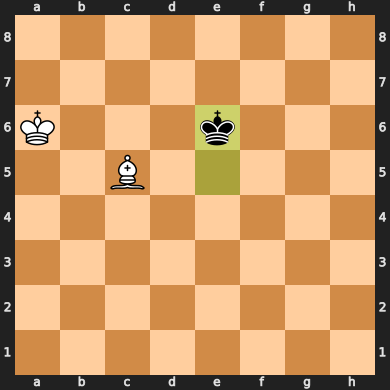

In [5]:
import random

import chess

from engines.random_engine import RandomEngine
from utils.play import playGame

random.seed(42)

board = chess.Board()
playGame(board, RandomEngine(), RandomEngine())

In [6]:
import random

import chess

from engines.random_engine import RandomEngine
from engines.human_engine import HumanEngine
from utils.play import playGame

random.seed(42)

board = chess.Board()
# playGame(board, RandomEngine(), HumanEngine(), displayBoard=True)
# print(board.outcome())

In [7]:
from evaluation.piece_evaluator import PieceEvaluator
from evaluation.data import capablanca_data 

pieceEvaluator = PieceEvaluator(capablanca_data.PIECE_VALUES, capablanca_data.VALUE_CHECKMATE, capablanca_data.VALUE_DRAW)

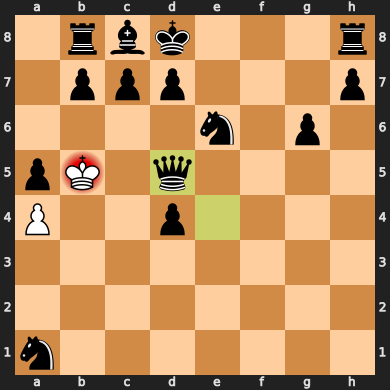

In [8]:
import random

import chess

from engines.random_engine import RandomEngine
from engines.evaluation_engine import EvaluationEngine
from utils.play import playGame

random.seed(42)

board = chess.Board()
playGame(board, RandomEngine(), EvaluationEngine(pieceEvaluator))

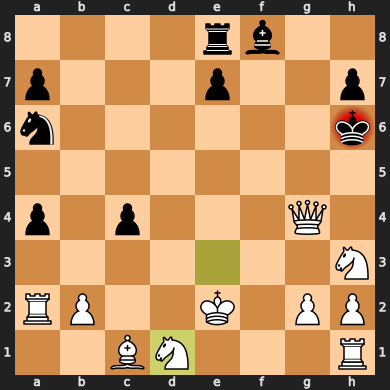

In [9]:
import random

import chess

from engines.mini_max_engine import MiniMaxEngine
from engines.evaluation_engine import EvaluationEngine
from utils.play import playGame

random.seed(42)

board = chess.Board()
playGame(board, MiniMaxEngine(pieceEvaluator, look_ahead_depth=2), EvaluationEngine(pieceEvaluator))

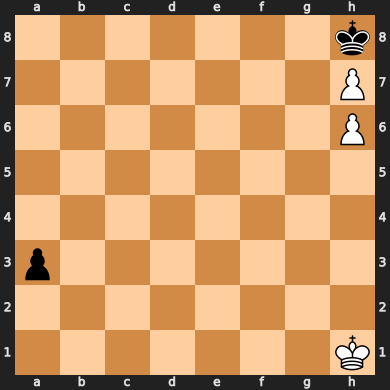

[ScoredMove(score=-7, move=Move.from_uci('a3a2')), ScoredMove(score=-1, move=Move.from_uci('h8h7'))]


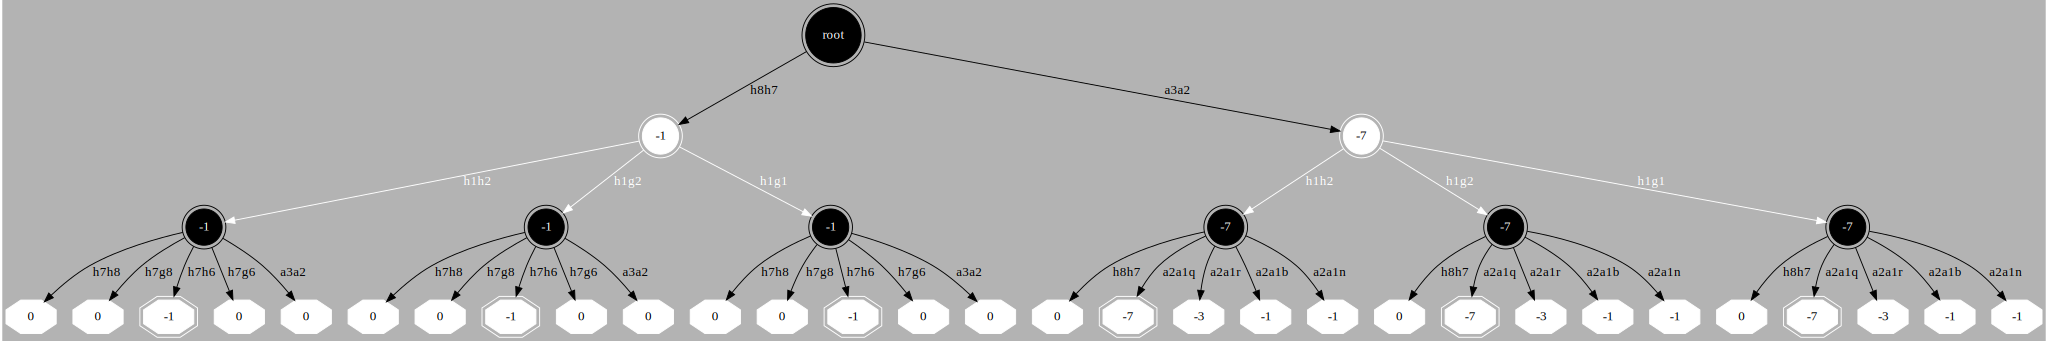

In [10]:
import IPython.display

from engines.mini_max_engine import MiniMaxEngine
import utils.min_max_tree

random.seed(42)

sample_minimax_board = chess.Board("7k/7P/7P/8/8/p7/8/7K b - - 0 1")
IPython.display.display(sample_minimax_board)

engine = MiniMaxEngine(pieceEvaluator, look_ahead_depth=2)
tree = utils.min_max_tree.add_tree_to_engine(engine)
print(engine.analyse(sample_minimax_board))
tree.draw()

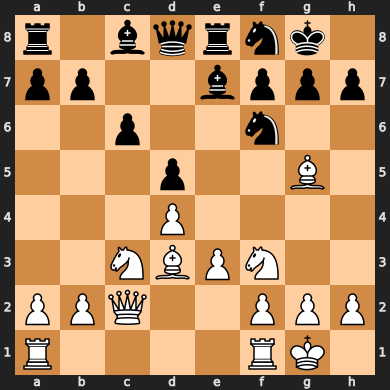

In [11]:
middlegame_board = chess.Board(
    "r1bqrnk1/pp2bppp/2p2n2/3p2B1/3P4/2NBPN2/PPQ2PPP/R4RK1 w - - 7 11"
)
IPython.display.display(middlegame_board)

In [12]:
from engines.mini_max_engine import MiniMaxEngine

engine = MiniMaxEngine(pieceEvaluator, look_ahead_depth=2)
result_minimax_piece_evaluator_depth2 = engine.analyse(sample_minimax_board)

In [13]:
from engines.alpha_beta_pruning import AlphaBetaPruningEngine

engine = AlphaBetaPruningEngine(pieceEvaluator, look_ahead_depth=2)
result_alphaBetaPruning_piece_evaluator_depth2 = engine.analyse(sample_minimax_board)
assert result_alphaBetaPruning_piece_evaluator_depth2 == result_minimax_piece_evaluator_depth2

In [14]:
from engines.nega_max_alpha_beta_pruning import NegaMaxAlphaBetaPruningEngine

engine = NegaMaxAlphaBetaPruningEngine(pieceEvaluator, look_ahead_depth=2)
result_negaMaxAlphaBetaPruning_piece_evaluator_depth2 = engine.analyse(sample_minimax_board)
assert result_negaMaxAlphaBetaPruning_piece_evaluator_depth2 == result_minimax_piece_evaluator_depth2

In [15]:
from engines.iterative_deepening_engine import IterativeDeepeningEngine

engine = IterativeDeepeningEngine(pieceEvaluator, max_look_ahead_depth=2)
result_iterativeDeepening_piece_evaluator_depth2 = engine.analyse(sample_minimax_board)
assert result_iterativeDeepening_piece_evaluator_depth2 == result_minimax_piece_evaluator_depth2

Max depth: 2
Depth 0
Depth 1
Depth 2


In [16]:
from engines.iterative_deepening_engine import IterativeDeepeningCacheEngine

engine = IterativeDeepeningCacheEngine(pieceEvaluator, max_look_ahead_depth=2)
result_iterativeDeepeningCache_piece_evaluator_depth2 = engine.analyse(sample_minimax_board)
assert result_iterativeDeepeningCache_piece_evaluator_depth2 == result_minimax_piece_evaluator_depth2

Max depth: 2
Depth 0
Depth 1
Depth 2


## Simplified Evaluation

In [17]:
from evaluation.piece_square_evaluator import PieceSquareEvaluator
from evaluation.data import simplified_evaluation_data 

pieceSquareEvaluator = PieceSquareEvaluator(simplified_evaluation_data.PIECE_VALUES, simplified_evaluation_data.PIECE_SQUARE_VALUES, simplified_evaluation_data.VALUE_CHECKMATE, simplified_evaluation_data.VALUE_DRAW)

In [18]:
from engines.iterative_deepening_engine import IterativeDeepeningCacheEngine

engine = IterativeDeepeningEngine(pieceSquareEvaluator, max_look_ahead_depth=2)
result_iterativeDeepeningEngine_pieceSquareEvaluator_depth2 = engine.analyse(middlegame_board)

Max depth: 2
Depth 0
Depth 1
Depth 2


In [19]:
from engines.iterative_deepening_engine import IterativeDeepeningCacheEngine

engine = IterativeDeepeningCacheEngine(pieceSquareEvaluator, max_look_ahead_depth=2)
result_iterativeDeepeningCacheEngine_pieceSquareEvaluator_depth2 = engine.analyse(middlegame_board)
assert result_iterativeDeepeningCacheEngine_pieceSquareEvaluator_depth2 == result_iterativeDeepeningEngine_pieceSquareEvaluator_depth2

Max depth: 2
Depth 0
Depth 1
Depth 2


## Incremental Simplified Evaluation

In [22]:
from evaluation.piece_square_evaluator import IncrementalPieceSquareEvaluator
from evaluation.data import simplified_evaluation_data 

incrementalPieceSquareEvaluator = IncrementalPieceSquareEvaluator(simplified_evaluation_data.PIECE_VALUES, simplified_evaluation_data.PIECE_SQUARE_VALUES, simplified_evaluation_data.VALUE_CHECKMATE, simplified_evaluation_data.VALUE_DRAW)

In [23]:
from engines.incremental_iterative_deepening_engine import IncrementalIterativeDeepeningEngine

engine = IncrementalIterativeDeepeningEngine(incrementalPieceSquareEvaluator, max_look_ahead_depth=2)
result_iterativeDeepeningEngine_incrementalPieceSquareEvaluator_depth2 = engine.analyse(middlegame_board)
assert result_iterativeDeepeningEngine_incrementalPieceSquareEvaluator_depth2 == result_iterativeDeepeningEngine_pieceSquareEvaluator_depth2

Max depth: 2
Depth 0
Depth 1
Depth 2


In [26]:
from engines.incremental_iterative_deepening_engine import IncrementalIterativeDeepeningCacheEngine

engine = IncrementalIterativeDeepeningCacheEngine(incrementalPieceSquareEvaluator, max_look_ahead_depth=2)
result_iterativeDeepeningCacheEngine_incrementalPieceSquareEvaluator_depth2 = engine.analyse(middlegame_board)
assert result_iterativeDeepeningCacheEngine_incrementalPieceSquareEvaluator_depth2 == result_iterativeDeepeningEngine_pieceSquareEvaluator_depth2

Max depth: 2
Depth 0
Depth 1
Depth 2


# Quience Search

In [94]:
from engines.quiesce_engine import QuiesceEngine

engine = QuiesceEngine(incrementalPieceSquareEvaluator, max_look_ahead_depth=2)
result_quiesceEngine_pieceSquareEvaluator_depth2 = engine.analyse(middlegame_board)

Max depth: 2
Depth 0
Depth 1
Depth 2


In [95]:
from engines.quiesce_engine import QuiesceCacheEngine

engine = QuiesceCacheEngine(incrementalPieceSquareEvaluator, max_look_ahead_depth=2)
result_quiesceCacheEngine_pieceSquareEvaluator_depth2 = engine.analyse(middlegame_board)
assert result_quiesceCacheEngine_pieceSquareEvaluator_depth2 == result_quiesceEngine_pieceSquareEvaluator_depth2

Max depth: 2
Depth 0
Depth 1
Depth 2


In [129]:
%%time
board = chess.Board()
engine = QuiesceCacheEngine(incrementalPieceSquareEvaluator, max_look_ahead_depth=4)
engine.analyse(middlegame_board)

Max depth: 4
Depth 0
Depth 1
Depth 2
Depth 3
Depth 4
CPU times: user 2min 38s, sys: 159 ms, total: 2min 38s
Wall time: 2min 38s


[ScoredMove(score=-255, move=Move.from_uci('g7h6')),
 ScoredMove(score=30, move=Move.from_uci('f8g6')),
 ScoredMove(score=30, move=Move.from_uci('f8e6')),
 ScoredMove(score=30, move=Move.from_uci('c6c5')),
 ScoredMove(score=30, move=Move.from_uci('d8b6')),
 ScoredMove(score=30, move=Move.from_uci('c8g4')),
 ScoredMove(score=35, move=Move.from_uci('e7b4')),
 ScoredMove(score=35, move=Move.from_uci('c8d7')),
 ScoredMove(score=35, move=Move.from_uci('e7d6')),
 ScoredMove(score=35, move=Move.from_uci('c8e6')),
 ScoredMove(score=40, move=Move.from_uci('a7a6')),
 ScoredMove(score=40, move=Move.from_uci('d8a5')),
 ScoredMove(score=40, move=Move.from_uci('d8d7')),
 ScoredMove(score=40, move=Move.from_uci('f6h5')),
 ScoredMove(score=40, move=Move.from_uci('f6e4')),
 ScoredMove(score=45, move=Move.from_uci('a7a5')),
 ScoredMove(score=50, move=Move.from_uci('f8d7')),
 ScoredMove(score=50, move=Move.from_uci('f6g4')),
 ScoredMove(score=50, move=Move.from_uci('g8h8')),
 ScoredMove(score=50, move=Mo

In [128]:
%%time
engine = QuiesceCacheEngine(incrementalPieceSquareEvaluator, max_look_ahead_depth=6)
engine.play(middlegame_board)

Max depth: 5
Depth 0
Depth 1
Depth 2
Depth 3
Depth 4
Depth 5
Score: -255
CPU times: user 18.1 s, sys: 9.66 ms, total: 18.1 s
Wall time: 18.2 s


<PlayResult at 0x7fbb93ae0f70 (move=g7h6, ponder=None, info={}, draw_offered=False, resigned=False)>

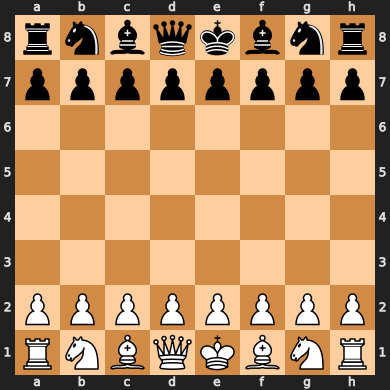

AttributeError: 'tuple' object has no attribute 'play'

In [103]:
import chess

from engines.random_engine import RandomEngine
from engines.human_engine import HumanEngine
from utils.play import playGame

random.seed(42)

board = chess.Board()
playGame(board, (), HumanEngine(), displayBoard=True)
# print(board.outcome())